In [ ]:
!pip install pandas numpy matplotlib scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
df = pd.read_csv("/content/data.csv", encoding='latin1')
df.head()

/tmp/ipython-input-1408989843.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [ ]:
x = df["no2"].dropna().values

In [ ]:
r = 102303596

In [ ]:
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

z = x + ar * np.sin(br * x)

In [ ]:
z_mean = np.mean(z)
z_std = np.std(z)
z_norm = (z - z_mean) / z_std

hist, edges = np.histogram(z_norm, bins=30, density=True)
centers = (edges[:-1] + edges[1:]) / 2

In [ ]:
def pdf_model(val, c, lam, mu):
    return c * np.exp(-lam * (val - mu)**2)

In [ ]:
c0 = hist.max()
lam0 = 1.0
mu0 = 0.0

In [ ]:
params, _ = curve_fit(
    pdf_model,
    centers,
    hist,
    p0=[c0, lam0, mu0],
    bounds=(0, [10, 10, 5]),
    maxfev=50000
)

c_est, lambda_est, mu_est = params

In [ ]:
print("FINAL PARAMETERS")
print("c =", c_est)
print("lambda =", lambda_est)
print("mu =", mu_est)


FINAL PARAMETERS
c = 9.999999999999387
lambda = 6.4422955572621445
mu = 5.4326844711704016e-45


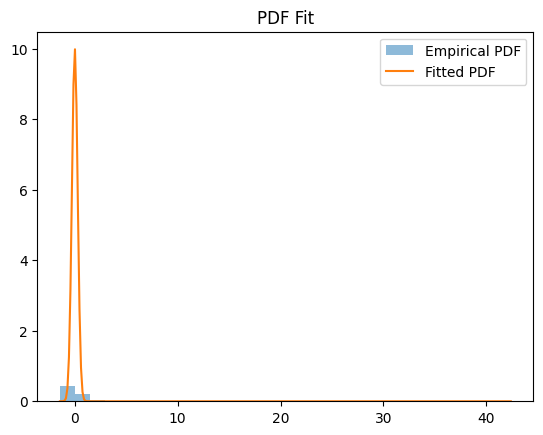

In [ ]:
z_range = np.linspace(min(z_norm), max(z_norm), 300)

plt.hist(z_norm, bins=30, density=True, alpha=0.5, label="Empirical PDF")
plt.plot(z_range,
         pdf_model(z_range, c_est, lambda_est, mu_est),
         label="Fitted PDF")

plt.legend()
plt.title("PDF Fit")
plt.show()


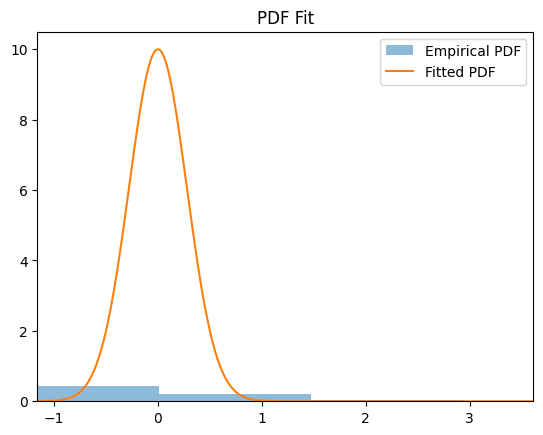

In [ ]:
low = np.percentile(z_norm, 1)
high = np.percentile(z_norm, 99)

z_range = np.linspace(low, high, 300)

plt.hist(z_norm, bins=30, density=True, alpha=0.5, label="Empirical PDF")

plt.plot(
    z_range,
    pdf_model(z_range, c_est, lambda_est, mu_est),
    label="Fitted PDF"
)

plt.xlim(low, high)
plt.legend()
plt.title("PDF Fit")
plt.show()
